# Plane Waves and Optical Interactions

$\renewcommand{\Re}{\operatorname{Re}}
\renewcommand{\Im}{\operatorname{Im}}$
Welcome to the Finesse Workshop! Our aim is to introduce you to modelling gravitational wave detectors with Finesse. By the end of the workshop we hope to have taught you how to model various aspects of a detector, such as producing your own quantum noise limited sensitivity curve for a gravitational wave detector.

These sessions together will cover the following material:
  * Fabry-Perot interferometers
  * Modulation and demodulation
  * Michelson interferometers
  * Locking and control
  * Noise couplings
  * Quantum noise

**Important reference material**:
  * Review article on interferometry: <a href="https://link.springer.com/article/10.1007/s41114-016-0002-8">Interferometer Techniques for Gravitational-Wave Detection</a>
  * Finesse main page: <a href="http://www.gwoptics.org/finesse">http://www.gwoptics.org/finesse</a>
  * <a href="http://www.gwoptics.org/finesse/reference/">Finesse online syntax reference</a>
  * <a href="http://www.gwoptics.org/finesse/reference/cheatsheet.php">Finesse online cheatsheet/FAQ</a>
  * <a href="http://kvasir.sr.bham.ac.uk/redmine/attachments/download/131/Finesse_2.0_manual.pdf">Finesse manual</a> (>200 pages pdf file)
  
Before we get started modelling optics in Finesse, it is important to understand the basic physics involved in an optics simulation. Here, we will briefly introduce the concepts that Finesse is based on. All of this information, and a lot more, is explained in detail in [
Interferometer Techniques for Gravitational-Wave Detection](https://link.springer.com/article/10.1007/s41114-016-0002-8).

*N.B. Amongst ourselves, we often refer to this paper (Interferometer Techniques for Gravitational-Wave Detection) as the "Living Review" (the journal it was published in). Just remember that if we mention the Living Review, we mean [
Interferometer Techniques for Gravitational-Wave Detection](https://link.springer.com/article/10.1007/s41114-016-0002-8).*

#### In this notebook:
  - Learn about the mathematical basis for almost all of the modelling we'll be doing
  - See how different components are represented in this basis

## Plane Waves

The choice of mathematical description used to describe light fields depends on the problems that we wish to solve. We start from the full description of the electric field for a par-axial (beam like) light field:

$$
\vec{E}(x, y, z, t) = E_0 \vec{e}_p \cos(\omega t - \vec{k}\vec{r} + \varphi) \cdot U(x, y, z).
$$

The notation used is as follows:

| Notation &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;              | Meaning |
:-----------------------|:---------|
| $\vec{a}$             | Vector  |
| $\vec{e}_p$           | Unit vector in direction of polarisation  |
| $\vec{E}(x, y, z, t)$ | Electric field vector as a function of space and time  |
| $E_0$                 | Electric field amplitude in units of $\mathrm{V/m}$ |
| $\omega$              | Angular frequency of oscillation, $\omega = 2\pi f$ |
| $\vec{k}$             | Vector in the direction of the beam axis, $k = |\vec{k}| = \omega / c$ |
| $\varphi$             | Phase offset in radians |
| $U(x, y, z)$          | Function descripting the shape of the beam |

This is quite a complex equation. For the purpose of modelling interferometers for gravitational wave detection, we can make some assumptions to simplify it:

1. We can ignore polarisation if there are no polarising elements present:

$$\vec{e}_p \rightarrow 1, \vec{E} \rightarrow E$$

2. We align our coordinate system with the beam axis:

$$\vec{K}\cdot\vec{r} = k \cdot z \rightarrow \cos(\omega t - \vec{k}\vec{r} + \varphi) = \cos(\omega t - kz + \varphi)$$

3. For now, we ignore the shape of the beam - this is called the "plane wave" model:

$$U(x, y, z) = 1$$

Note that this last point implies that the beam has an infinitely large cross-section, as it is now completely independent of $x$ and $y$. This is clearly unrealistic, so we don't model plane waves in practice. However, the equations for plane waves are useful as a model for laser beams, with the power on the axis of the plane wave representing the power in the beam, so we model just this on-axis part of the plane wave.

All of these points together give us a simplified equation for the beam,

$$ E = E_0 \cos(\omega t - k z + \varphi). $$

### Detecting beams

When we detect a beam, we use a component called a photodiode, which produces an electrical signal proportional to the **power** of the beam incident upon it (not the electric field!). The power at any one point $z_0$ is the cross-sectional integral of the beam's intensity,

$$P = \int\int I(x, y, z_0)\,\mathrm{d}x\mathrm{d}y,$$

where $I = c\varepsilon_0 E^2$. Setting $z_0 = 0$ to the location of our photodiode for convenience,

$$
\begin{align}
P &= c\varepsilon_0 E_0^2 \cos^2(\omega t)\\
&= \frac{c\varepsilon_0}{2} E_0^2 \left(1 + \cos(2 \omega t)\right)\\
&= \frac{c\varepsilon_0}{2} E_0^2
\end{align}
$$

You may have noticed that the $\cos(2\omega t)$ term dissapeared at the end. This is due to the timescales involved; in gavitational wave detectors, $\omega$ is on the order of $10^{15}\,$Hz. This is far too fast for any photodiode to detect, so we see the power of the field as constant.

### Complex Notation
Next, we introduce a complex notation for the field. We rewrite the real field as

$$E' = E_0'\cos(\omega t - k z + \varphi),$$
and redefine $E$ as
$$E = E_0 e^{i(\omega t - k z)}$$
with
$$E_0 = E_0'e^{i\varphi},$$

allowing us to simplify various operations. For example, a change in the phase of the field by $\phi$ can now be represented by a multiplication of $E$ with $e^{i\phi}$ (This is especially important for the method Finesse uses to model interferometers).

The electric field is now the real part of this complex field: $E' = \Re\{E\}$. It is important to remember that $E$ is **not** the actual field (complex numbers never describe physical quantities), merely a convenience for us to do calculations with. Finally, we adjust the units of $E_0$ to be $\sqrt{W}$ by absorbing a constant factor of $\sqrt{c\varepsilon_0 / 2}$ into our definition, so that the power in the field is simply given by $E_0 E_0^* = |E_0|^2$. We therefore have:

$$E = E_0 e^{i(\omega t - k z)}$$
$$P = |E_0|^2$$

This is the basis that we will work in for the rest of the workshop.

## Optical Interactions With Components

There are only 5 main components needed to understand how a basic interferometer works. Lasers act simply as a source of the electric field, and we have already seen how photodiodes detect the power in the beam at a specific point. We'll now take a look at the other three: mirrors, spaces, and beamsplitters.

### Mirror

<img src="assets/01-mirror_3d.svg" style="width: 300px; margin: auto; display: block;"/>

The image above shows laser light incident on a mirror, with some light transmitted and some reflected. For the purposes of illustration, we normally draw a simplified representation of the above mirror, with the fields labeled similarly to the below image.

<img src="assets/01-mirror.svg" style="width: 200px; margin: auto; display: block;"/>

For now, we will not consider the thickness of the mirror, and treat it as an infinitely thin plane. We can write the incident field $E_\mathrm{in}$ as

$$E_\mathrm{in} = E_0 e^{i\omega t},$$

taking $z=0$ to be the mirror's position for convenience. Consider what happens to this field upon reflection or transmission through the mirror. The $e^{i\omega t}$ term cannot change, as the field must be continuous at all points. The change must therefore be solely in the amplitude and phase of the field, $E_0$:

$$
\begin{align}
E_r &= r E_\mathrm{in}\\
E_t &= it E_\mathrm{in}
\end{align}
$$

where $r$ is the **amplitude** reflectivity of the mirror, and $t$ is its amplitude transmissivity. We call these equations the **coupling equations** for the mirror. The $i$ on transmission represents a $90^\circ$ phase change, which arises from energy conservation (for a full explanation of this, see the Living Review). Conversely, we can use the mirror's **power** reflectivity $R = r^2$ and transmissivity $T = t^2$. Real optics also have some amount of loss due to e.g. absorbing some of the laser light. For now, we will ignore any losses, meaning that $R + T = 1$ due to energy conservation.

*N.B. We've made many simplifications to reach this representation of a mirror. For the purposes of modelling the interferometers used in gravitational wave detectors, experience tells us that these simplifications are justified, but it is useful to remember that they are there for the situations where they do not hold.*

<div style="background-color:#cceffc;padding:10px;">

### Task 1: Mirror interaction

Given an input field $E_\mathrm{in}$ with a power of 1W incident on a mirror with reflectivity $r = 0.8$, calculate the power of:
1. The reflected field, $E_r$
2. The transmitted field, $E_t$ 
</div>

In an interferometer, many mirrors will have light incident on both sides, not just one, so our picture above is incomplete. When multiple fields overlap, they simply add together. This allows us to write the full coupling equations for our mirror:

<img src="assets/01-mirror_full.svg" style="width: 200px; margin: auto; display: block;"/>

$$
\begin{align}
a_2 &= r a_3 + it a_1\\
a_4 &= r a_1 + it a_3
\end{align}
$$

There's a slight change in notation here, as we've renamed our various fields as $a_n$. They're just the same complex $E$ fields as before however. This is the notation used from hereon, and also in the Living Review.

### Space

<img src="assets/01-space.svg" style="width: 300px; margin: auto; display: block;"/>

Propagation through free space causes a phase change in the light proportional to the length of the space:

$$
\begin{align}
a_2 &= a_1 e^{-i k L}\\
a_4 &= a_3 e^{-i k L}
\end{align}
$$

Remember that $k$ is the wavenumber of the light, $\omega / c$, so this phase change depends on the light's frequency.

### Beamsplitter

<img src="assets/01-beamsplitter.svg" style="width: 200px; margin: auto; display: block;"/>

Beamsplitters can be considered as rotated mirrors; the only difference for now is the number of separate fields present. The couplings are as you might expect:

$$
\begin{align}
a_2 &= r a_1 + it a_7\\
a_4 &= r a_7 + it a_1\\
a_6 &= r a_5 + it a_3\\
a_8 &= r a_3 + it a_5\\
\end{align}
$$

## Aside: Coupling Matrices

As an alternative to the sets of equations given above, we can write the field couplings at a component as a matrix. For a mirror, the coupling matrix would be:

$$
\begin{pmatrix}
a_2\\
a_4
\end{pmatrix}
=
\begin{pmatrix}
it & r\\
r & it
\end{pmatrix}
\begin{pmatrix}
a_1\\
a_3
\end{pmatrix}
$$

and for a space:

$$
\begin{pmatrix}
a_2\\
a_4
\end{pmatrix}
=
\begin{pmatrix}
e^{-i k L} & 0\\
0 & e^{-i k L}
\end{pmatrix}
\begin{pmatrix}
a_1\\
a_3
\end{pmatrix}
$$

This is especially helpful when it comes to modelling these components on a computer, as many highly-efficient algorithms have been developed specifically for solving matrix problems like these. It also highlights one of the key advantages of the complex notation you've just been introduced to; if phase changes couldn't be represented by a simple multiplication, this matrix formulation would not work, and numerical modelling of detectors would be much more complicated.

#  Aside: Gaussian Beams

The analysis using a plane-wave approximation as described so far allows one to perform a large variety of simulations. However, some tasks must include the phase-front shape and position, i.e. the properties of the field transverse to the propagation axis. For example, the effects of misaligned components can only be computed if the beam shape and position are taken into account.

In this notebook we'll overview Gaussian beams, then learn to work with them in Finesse by returning to our first model: the Fabry-Perot cavity.

_As usual, run the cell below to get started._

In [2]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting
import scipy                     # for analysing the plots

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90,fmts=['png'])

                                              ..-
    PyKat 1.1.331         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



# Gaussian beams: going beyond the plane-wave approximation

_**NB** The text given here is just a short overview of Gaussian optics. For a more complete understanding, please read Chapter 9 of the <a href="https://link.springer.com/article/10.1007/s41114-016-0002-8">Living Review</a> and/or sections 1-3 of <a href="https://doi.org/10.1364/AO.5.001550">Laser Beams and Resonators, Kogelnik and Li, 1966</a>_

The plane-wave approximation describes the propagation of a field in one dimention: the beam ($z$, usually) axis. A more detailed description takes into account the geometrical shape of the beam. One method of treating the transverse beam geometry is to describe the spatial properties as a sum of ‘spatial components’ or ‘spatial modes’ so that the electric field can be written as a sum of the different frequency components and of the different spatial modes. Of particular interest are _Gaussian modes_, as many lasers emit light which closely ressembles a Gaussian beam due to their construction using an optical cavity with spherical mirrors.

All electromagnetic waves are solutions to the general wave equation &emsp;&emsp; $\nabla^2 \mathbf {E}-\frac{1}{c^2}\ddot{\mathbf {E}}=0$. 

The <a href="https://en.wikipedia.org/wiki/Paraxial_approximation">_paraxial approximation_</a>, which is also used in ray optics, can be applied in cases where the field dominantly propagates along a single axis. In this case we can describe any paraxial field as

\begin{aligned} E(x,y,z)=u(x,y,z)~\exp {\left( -\mathrm {i}\,kz\right) }. \end{aligned}

where $u(x,y,z)$ describes the shape of the beam. This can then be used to write the _paraxial wave equation_,

\begin{aligned} \left( \partial _x^2+\partial _y^2\right) u(x,y,z)-2\mathrm {i}\,k\partial _z u(x,y,z)=0 \end{aligned}

Generally speaking, any solution to the paraxial wave equation can be used to describe the transverse properties of a scalar electric field representing a beam-like electromagnetic wave. However, there are particular solutions that are especially useful to us, because they form a complete, infinite, countable set. Such a family of solutions is called a set of transverse electromagnetic modes (TEMs). One very common example of such a set are the **Hermite-Gauss (HG) modes**, which is the set used by Finesse. That they form a 'complete' set means that they can be considered as a base system for _all_ solutions to the paraxial wave equation. In other words, _any_ paraxial solution can be described as a linear sum of HG modes, and in turn any laser field can be written in the form
\begin{aligned} E(t,x,y,z)=\sum _{j}~\sum _{n,m}~a_{jnm}~u_{nm}(x,y,z)~\exp {\left( \mathrm {i}\,(\omega _j \,t-k_j z)\right) }. \end{aligned}
where for each component in the summation $a$ is the complex field amplitude, $u$ describes the beam shape, and $\omega$ and $k$ are the angular frequency and wavenumber of that field component. 


## The Fundamental Gaussian Mode
An ideal laser emits a fundamental Gaussian beam because the beam is generated using an optical cavity with spherically curved mirrors. The fundamental Gaussian mode is given by 
\begin{aligned} u_{00}(x,y,z)=\sqrt{\frac{2}{\pi }}~\frac{1}{w(z)}~\exp {\left( \mathrm {i}\,\varPsi (z)\right) }~ \exp {\left( -\mathrm {i}\,k\frac{x^2+y^2}{2R_C(z)}-\frac{x^2+y^2}{w^2(z)}\right) }. \end{aligned}
We will explore what these parameters mean below. 
 
The radial ($r$) intensity profile of a beam of power $P$ is given by:

\begin{eqnarray}I(r)=\frac{2P}{\pi w^2(z)}\exp {\left( -2r^2/w^2\right) }\end{eqnarray}

The beam is characterised by its _spot size_, $w$, which is the radius at which the intensity has dropped to $I_{\rm max}/e^2$. You should notice that $I(r)$ is a Gaussian distribution, which is where the name comes from. As the beam propagates along the beam axis, $z$, the spot size changes slowly, producing a narrow, paraxial beam of light. 

We can also consider the _beam profile_, i.e. how the spot size changes along the optical axis:

<img src="https://media.springernature.com/lw785/springer-static/image/art%3A10.1007%2Fs41114-016-0002-8/MediaObjects/41114_2016_2_Fig80_HTML.gif" width=50%>

The beam profile is entirely characterised by the laser wavelength $\lambda$, the _beam waist_ size, $w_0$, and the waist position $z_0$. From these we can find out some useful charateristics of the beam, including:

* the _Rayleigh range_, $z_R$, which separates the beam into two regimes: the 'near field' around the waist, and the 'far field', a long way from it. \begin{eqnarray}z_R = \frac{\pi w_0^2}{\lambda}\end{eqnarray}
* the spot size, $w(z)$:\begin{eqnarray}w(z)=w_0\sqrt{1+\left( \frac{z-z_0}{z_{\mathrm {R}}}\right) ^2} \end{eqnarray}
* The diffraction angle, $\Theta$ between the z-axis and $w$ in the far field, and 
* The radius of curvature of the wavefront (or 'phase front'), $R_C(z)$:\begin{eqnarray}R_C(z)=z-z_0+\frac{z_{\mathrm {R}}^2}{z-z_0}\end{eqnarray}


<div style="background-color:#cceffc;padding:10px;">
    
### Task 1: Understanding properties of the fundamental Gaussian mode
1. plot the intensity profile of a 1W laser beam with $w(z)=1$mm


2. plot the beam profile for a 1064nm laser beam with a waist  $w_0=370\mu$m at $z_0=0$, showing a symmetric region to twice the Rayleigh range.
</div>

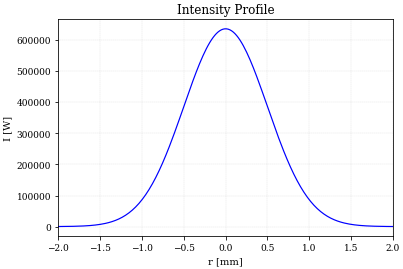

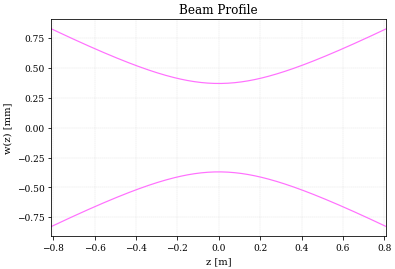

In [7]:
#Intensity profile
P = 1
w = 1e-3
r = np.linspace(-2*w,2*w,200)
I = ((2*P)/(np.pi*w**2))*np.exp(-2*r**2/w**2)
plt.figure()
plt.plot(r*1000,I)
plt.xlabel('r [mm]')
plt.ylabel('I [W]')
plt.title("Intensity Profile")

#beam profile
w_0=370e-6
z_0=0
lambda0=1064e-9
z_R=np.pi*w_0**2/lambda0
z=np.linspace(-2*z_R, 2*z_R,200)
wz=w_0*np.sqrt(1 + ((z-z_0)/z_R)**2)
plt.figure()
plt.plot(z,wz*1000, color='#ff70fe')
plt.plot(z,-wz*1000, color='#ff70fe') # Usually we plot this too to visualize the beam extent
plt.xlabel('z [m]')
plt.ylabel('w(z) [mm]')
#plt.ylim(0)
plt.title("Beam Profile");